In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [5]:
family = pd.read_csv('Data/familyxx.csv')
family["family_id"] = family["HHX"] + family["SRVY_YR"] + family["FMX"]
family.head()

,FINT_Y_P,FINT_M_P,FMX,RECTYPE,SRVY_YR,HHX,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,...,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT,family_id
0,2018,1,1,60,2018,1,1,11,1,11,...,1,2,2,NaN,2,1,1,NaN,NaN,2020
1,2018,1,1,60,2018,4,3,41,4,41,...,2,1,1,1.0,2,3,1,2.0,3.0,2023
2,2018,2,1,60,2018,6,4,41,4,41,...,2,2,2,NaN,1,4,1,2.0,4.0,2025
3,2018,3,1,60,2018,8,3,41,4,41,...,3,2,1,NaN,2,3,1,2.0,3.0,2027
4,2018,2,1,60,2018,9,1,11,1,11,...,2,1,1,1.0,2,1,1,2.0,0.0,2028


In [6]:
person = pd.read_csv('Data/personsx.csv')
person["family_id"] = person["HHX"] + person["SRVY_YR"] + person["FMX"]
person.head()

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG,family_id
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2025


In [141]:
merged_inner = person.merge(family, on = 'family_id', how='inner')
merged_inner

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73728,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
73729,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
73730,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0
73731,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


Accessibility Factors   
HIEMPOF --> Health insurance offered at workplace  
ENGLANG --> How well English is spoken  
FMEDBILL --> Problems paying or unable to pay any medical bills  
FOWBENYN --> Any family member receive other kind of welfare assistance   
(in adult dataset) PDSICKA --> Paid sick leave at current or most recent job  
FDMEDYN --> Any family member delay* seeking medical care, 12m?

   
Behavioral Factors   
PHCHN2WP --> Number of HOME visits by health professional, 2wk   
PHCPN2WP --> Number of PHONE calls to health professional, 2wk   
PHCDN2WP --> Number of times VISITED health professional, 2wk   
P10DVYR --> Did - - receive care 10+ times, 12m   
   
Predicting: FLAADLYN --> Any family member need help with an ADL?

In [142]:
model = merged_inner[["HIEMPOF", "ENGLANG", "FMEDBILL", "FDMEDYN", "P10DVYR", "FLAADLYN"]]
# removed cos lowest importance "FOWBENYN"

In [143]:
model = model[model["FLAADLYN"] < 7]

In [144]:
# for checking number of null values
for i in ['FLAADLYN']:
    if(model[i].isnull().values.any()):
        print(i + '  True  ' + str(model[i].isnull().sum()))
    else:
        print(i + '  False')

FLAADLYN  False


In [145]:
model.loc[model["FLAADLYN"] == 1]

,HIEMPOF,ENGLANG,FMEDBILL,FDMEDYN,P10DVYR,FLAADLYN
11,NaN,1.0,1,1,1,1
63,NaN,1.0,2,2,1,1
64,NaN,1.0,2,2,1,1
65,NaN,1.0,2,2,2,1
109,NaN,1.0,2,2,1,1
...,...,...,...,...,...,...
73589,NaN,1.0,2,2,1,1
73590,NaN,1.0,2,2,1,1
73662,NaN,1.0,2,2,2,1
73663,NaN,1.0,2,2,2,1


In [146]:
model.loc[model["FLAADLYN"] == 2]

,HIEMPOF,ENGLANG,FMEDBILL,FDMEDYN,P10DVYR,FLAADLYN
0,NaN,1.0,2,2,2,2
1,NaN,1.0,1,1,9,2
2,1.0,1.0,1,1,9,2
3,NaN,1.0,1,1,9,2
4,1.0,1.0,2,2,2,2
...,...,...,...,...,...,...
73728,1.0,1.0,2,2,2,2
73729,1.0,1.0,1,1,1,2
73730,1.0,1.0,2,2,2,2
73731,1.0,1.0,2,2,2,2


In [147]:
model = model.drop(model.query('FLAADLYN == 2').sample(frac=.95).index)

In [148]:
for i in model.columns:
    model[i] = model[i].fillna(round(0))
model

,HIEMPOF,ENGLANG,FMEDBILL,FDMEDYN,P10DVYR,FLAADLYN
11,0.0,1.0,1,1,1,1
15,0.0,0.0,1,1,1,2
17,0.0,1.0,2,2,1,2
40,0.0,1.0,2,2,2,2
43,2.0,1.0,2,1,1,2
...,...,...,...,...,...,...
73691,1.0,1.0,2,1,2,2
73704,1.0,1.0,2,2,2,2
73706,0.0,1.0,1,2,2,1
73720,0.0,1.0,2,2,2,2


In [149]:
X = model[["HIEMPOF", "ENGLANG", "FMEDBILL", "FDMEDYN", "P10DVYR"]]
y = model["FLAADLYN"]

# removed cos lowest importance "FOWBENYN"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Test accuracy: 0.6331279945242985, Test error: 0.36687200547570153


In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

# low recall --> not finding all of the specific cases, ex. 0.5 only found half of the ones
# filter test rows --> look for patterns
# look deeper into the why
# error analysis, do i have the right features

              precision    recall  f1-score   support

           1       0.71      0.50      0.59       764
           2       0.59      0.78      0.67       697

    accuracy                           0.63      1461
   macro avg       0.65      0.64      0.63      1461
weighted avg       0.65      0.63      0.63      1461



array([0.06977938, 0.11558856, 0.19967625, 0.24949939, 0.36545641])

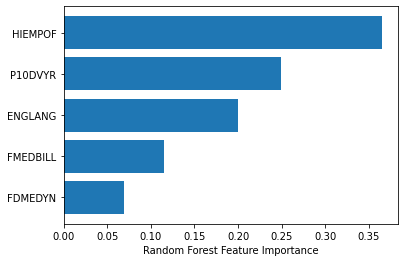

In [152]:
# sort by highest feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
rf_model.feature_importances_[sorted_idx]

In [153]:
# create array of integers to test for the n_estimators parameter
n_range = np.arange(40, 140, 1)

# calculate the training and testing error after testing each value
training_error = []
testing_error = []
for n in n_range:
    rf_model = RandomForestClassifier(n_estimators=n,max_depth=10, 
                                      random_state=0)

    rf_model.fit(X_train, y_train)
    
    y_pred_class = rf_model.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = rf_model.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# create a dataframe to store all the accuracy/ error values
column_dict = {'n': n_range, 'training error':training_error, 'testing error':testing_error}
errors = pd.DataFrame(column_dict).set_index('n').sort_index(ascending=True)
errors.head(10)

,training error,testing error
n,,
40,0.346062,0.349076
41,0.345890,0.349076
42,0.345890,0.347707
43,0.346062,0.349076
44,0.345890,0.349076
45,0.345890,0.349076
46,0.345890,0.349076
47,0.345890,0.349076
48,0.345890,0.349076


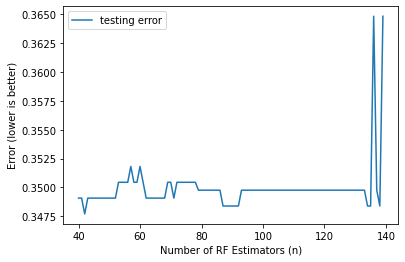

In [154]:
# Plot the relationship between number of RF estimators (n) and TESTING ERROR.
#errors.plot(y='testing error', color='black');
errors.plot(y='testing error');
plt.xlabel('Number of RF Estimators (n)');
plt.ylabel('Error (lower is better)');

In [155]:
# Find the minimum testing error and the associated K value.
errors.sort_values('testing error').head(10)

,training error,testing error
n,,
42,0.34589,0.347707
89,0.34589,0.348392
87,0.34589,0.348392
138,0.34589,0.348392
90,0.34589,0.348392
88,0.34589,0.348392
92,0.34589,0.348392
134,0.34589,0.348392
135,0.34589,0.348392


In [156]:
# best n value from graph
BEST_N = 45

In [157]:
depth_range = np.arange(2, 21, 1)
depth_range[:10]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [158]:
training_error = []
testing_error = []
for depth in depth_range:
    rf_model = RandomForestClassifier(n_estimators=BEST_N,max_depth=depth, 
                                      random_state=0)

    rf_model.fit(X_train, y_train)
    
    y_pred_class = rf_model.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = rf_model.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)
# Create a DataFrame of the search with training error, and testing error.
column_dict = {'depth': depth_range, 'training error':training_error, 'testing error':testing_error}
errors = pd.DataFrame(column_dict).set_index('depth').sort_index(ascending=True)
errors.head()

,training error,testing error
depth,,
2,0.371404,0.363450
3,0.354623,0.349076
4,0.352568,0.347707
5,0.350171,0.347707
6,0.348630,0.347023


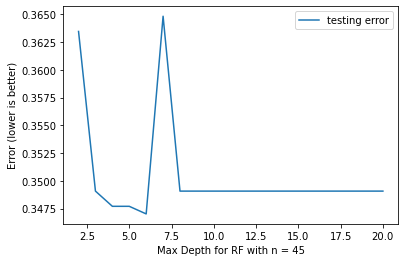

In [159]:
# Plot the relationship between number of RF estimators (n) and TESTING ERROR.
#errors.plot(y='testing error', color='black');
errors.plot(y='testing error');
plt.xlabel('Max Depth for RF with n = ' + str(BEST_N));
plt.ylabel('Error (lower is better)');

In [160]:
# Find the minimum testing error and the associated K value.
errors.sort_values('testing error').head(10)

,training error,testing error
depth,,
6,0.348630,0.347023
4,0.352568,0.347707
5,0.350171,0.347707
11,0.345890,0.349076
18,0.345890,0.349076
17,0.345890,0.349076
16,0.345890,0.349076
15,0.345890,0.349076
14,0.345890,0.349076


In [161]:
BEST_DEPTH = 3

In [162]:
# run after hyperparameter optimization
rf_model = RandomForestClassifier(n_estimators=BEST_N,max_depth=BEST_DEPTH, 
                                      random_state=0)

rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("Best RF Model Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Best RF Model Test accuracy: 0.6509240246406571, Test error: 0.34907597535934287


array([0.06439347, 0.06483409, 0.10282539, 0.30390673, 0.46404032])

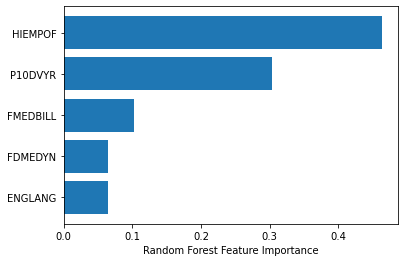

In [163]:
# sort by highest feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
rf_model.feature_importances_[sorted_idx]